In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer, TVAESynthesizer, GaussianCopulaSynthesizer


In [ ]:

DATA_PATH = "data/data_outputs_bank/train_df_bank.csv"
OUTPUT_DIR = "data/data_outputs_bank"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Samples to generate
SYN_SAMPLES = 10000

In [ ]:
# Load training data
train_df = pd.read_csv(DATA_PATH)

# Detect metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train_df)


In [ ]:
# Train CTGAN
print("Training CTGAN...")
ctgan = CTGANSynthesizer(metadata, epochs=300, verbose=True)
ctgan.fit(train_df)


#Generate synthetic data
synthetic_ctgan = ctgan.sample(SYN_SAMPLES)
synthetic_ctgan.to_csv(os.path.join(OUTPUT_DIR, "synthetic_ctgan_bank.csv"), index=False)
print("CTGAN synthetic data saved.")


Training CTGAN...


/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:144: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:122: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-1.35) | Discrim. (0.02): 100%|██████████| 300/300 [12:47<00:00,  2.56s/it] 

CTGAN synthetic data saved.


In [ ]:
# Train TVAE
print("Training TVAE...")
tvae = TVAESynthesizer(metadata, epochs=300)
tvae.fit(train_df)


# Generate synthetic data from TVAE
synthetic_tvae = tvae.sample(SYN_SAMPLES)
synthetic_tvae.to_csv(os.path.join(OUTPUT_DIR, "synthetic_tvae_bank.csv"), index=False)
print("TVAE synthetic data saved.")


/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:144: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


Training TVAE...
TVAE synthetic data saved.


In [ ]:
# Train GaussianCopula
print("Training GaussianCopula...")
copula = GaussianCopulaSynthesizer(metadata)
copula.fit(train_df
           

# Generate synthetic data from Gasussian Copula
synthetic_copula = copula.sample(SYN_SAMPLES)
synthetic_copula.to_csv(os.path.join(OUTPUT_DIR, "synthetic_copula_bank.csv"), index=False)
print("Copula synthetic data saved.")


Training GaussianCopula...


/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:144: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


Copula synthetic data saved.


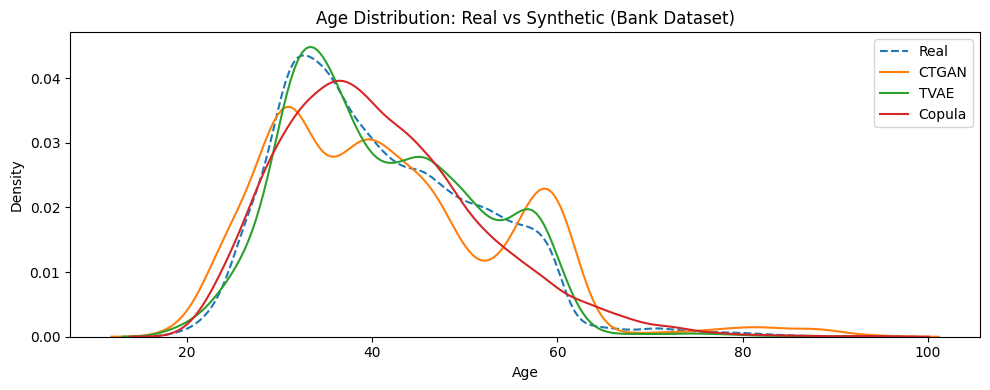

In [ ]:
# Plot age dist. for all datasets
plt.figure(figsize=(10, 4))
sns.kdeplot(train_df["age"], label="Real", linestyle="--")
sns.kdeplot(synthetic_ctgan["age"], label="CTGAN")
sns.kdeplot(synthetic_tvae["age"], label="TVAE")
sns.kdeplot(synthetic_copula["age"], label="Copula")

plt.title("Age Distribution: Real vs Synthetic (Bank Dataset)")
plt.xlabel("Age")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "bank_age_distribution_comparison.png"))
plt.show()